# **MULTIPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
Toyota = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
Toyota.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
Toyota.shape

(1436, 11)

**BAR Plots to visualize the count:**

<Axes: xlabel='HP'>

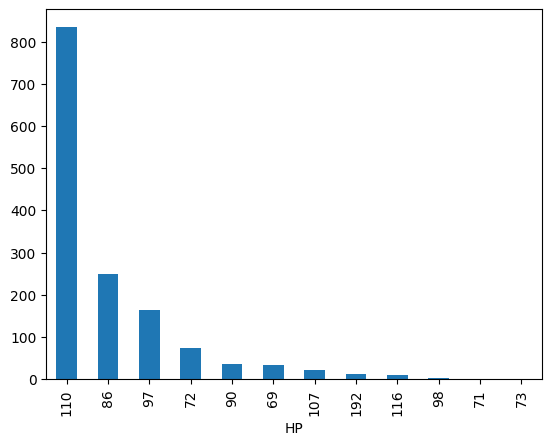

In [ ]:
Toyota.HP.value_counts().plot(kind="bar")

<Axes: xlabel='Automatic'>

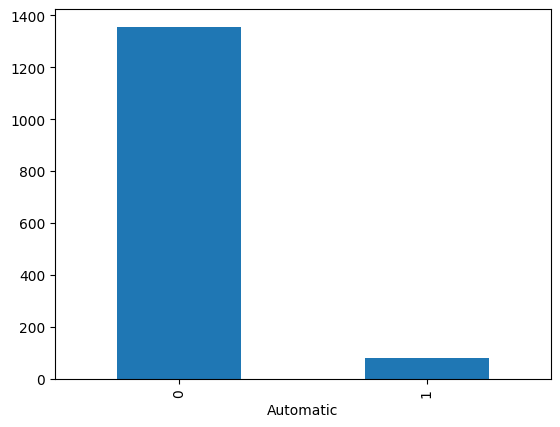

In [ ]:
Toyota.Automatic.value_counts().plot(kind="bar")

<Axes: >

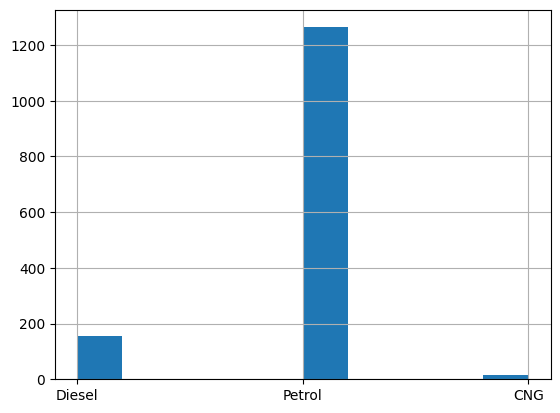

In [ ]:
Toyota['Fuel_Type'].hist()

<Axes: xlabel='cc'>

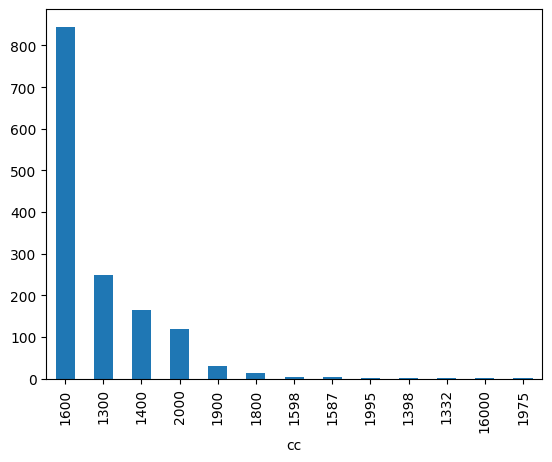

In [ ]:
Toyota.cc.value_counts().plot(kind="bar")

<Axes: xlabel='Doors'>

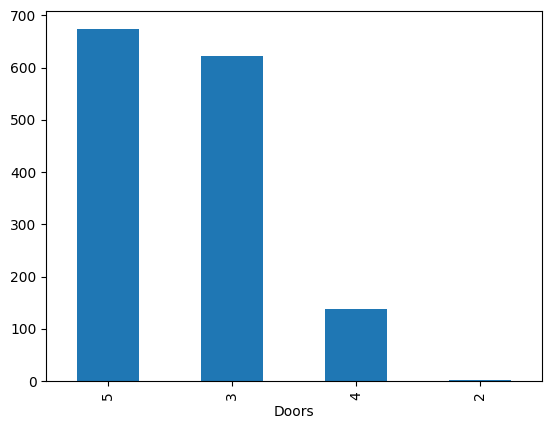

In [ ]:
Toyota.Doors.value_counts().plot(kind="bar")

<Axes: xlabel='Cylinders'>

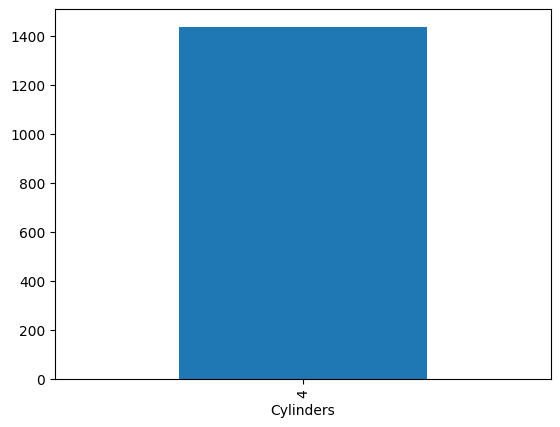

In [ ]:
Toyota.Cylinders.value_counts().plot(kind="bar")

<Axes: xlabel='Gears'>

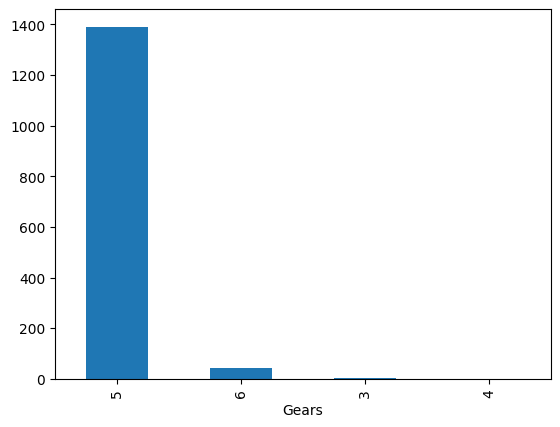

In [ ]:
Toyota.Gears.value_counts().plot(kind="bar")

In [ ]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
Toyota.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
#Finding the duplicates
Toyota[Toyota.duplicated()].shape

(1, 11)

In [ ]:
Toyota[Toyota.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
#Deleting the Duplicate row
Toyota=Toyota.drop_duplicates()

In [ ]:
Toyota.shape

(1435, 11)

As per the above bar plot visualisations columns Automatic,Cylinders and Gears don't have much variation in the data so we don't need the columns for building the model so, we can delete the columns.

In [ ]:
Toyota=Toyota.drop('Automatic',axis=1)

In [ ]:
Toyota=Toyota.drop('Cylinders',axis=1)

In [ ]:
Toyota=Toyota.drop('Gears',axis=1)

In [ ]:
Toyota

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,13500,23,46986,Diesel,90,2000,3,1165
1,13750,23,72937,Diesel,90,2000,3,1165
2,13950,24,41711,Diesel,90,2000,3,1165
3,14950,26,48000,Diesel,90,2000,3,1165
4,13750,30,38500,Diesel,90,2000,3,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,1025
1432,10845,72,19000,Petrol,86,1300,3,1015
1433,8500,71,17016,Petrol,86,1300,3,1015
1434,7250,70,16916,Petrol,86,1300,3,1015


**Normalization**:

We have one categorical column Fuel_Type in the given dataset which has three unique values CNG,Petrol,Diesel.So,To build the model,we need to apply Machine Learning Algorithms.Most machine learning algorithms works on numerical data only not on categorical columns.So,we need to do normalization then that categorical column will be converted into dummy variables which are of int type.

In [ ]:
hot_encoded_data=pd.get_dummies(Toyota,columns=['Fuel_Type'],dtype=int)

In [ ]:
hot_encoded_data

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,3,1165,0,1,0
1,13750,23,72937,90,2000,3,1165,0,1,0
2,13950,24,41711,90,2000,3,1165,0,1,0
3,14950,26,48000,90,2000,3,1165,0,1,0
4,13750,30,38500,90,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,1025,0,0,1
1432,10845,72,19000,86,1300,3,1015,0,0,1
1433,8500,71,17016,86,1300,3,1015,0,0,1
1434,7250,70,16916,86,1300,3,1015,0,0,1


**Correlation**

In [ ]:
hot_encoded_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.089614,0.062109,-0.533453,0.489110
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.302618,0.009680,0.025495,-0.027589
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,-0.039536,0.002389,0.144016,0.062109,0.005941,0.009680,0.052756,1.000000,-0.038074,-0.296717
Fuel_Type_Diesel,0.054084,-0.097740,0.403060,-0.533453,0.327723,0.025495,0.568087,-0.038074,1.000000,-0.942976
Fuel_Type_Petrol,-0.038516,0.092611,-0.433160,0.489110,-0.315170,-0.027589,-0.560470,-0.296717,-0.942976,1.000000


**Renaming the Column**

In [ ]:
#rename the Age column
hot_encoded_data1 = hot_encoded_data.rename({'Age_08_04': 'Age'}, axis=1)

In [ ]:
hot_encoded_data1

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,3,1165,0,1,0
1,13750,23,72937,90,2000,3,1165,0,1,0
2,13950,24,41711,90,2000,3,1165,0,1,0
3,14950,26,48000,90,2000,3,1165,0,1,0
4,13750,30,38500,90,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,1025,0,0,1
1432,10845,72,19000,86,1300,3,1015,0,0,1
1433,8500,71,17016,86,1300,3,1015,0,0,1
1434,7250,70,16916,86,1300,3,1015,0,0,1


**ScatterPlots Between Variables**

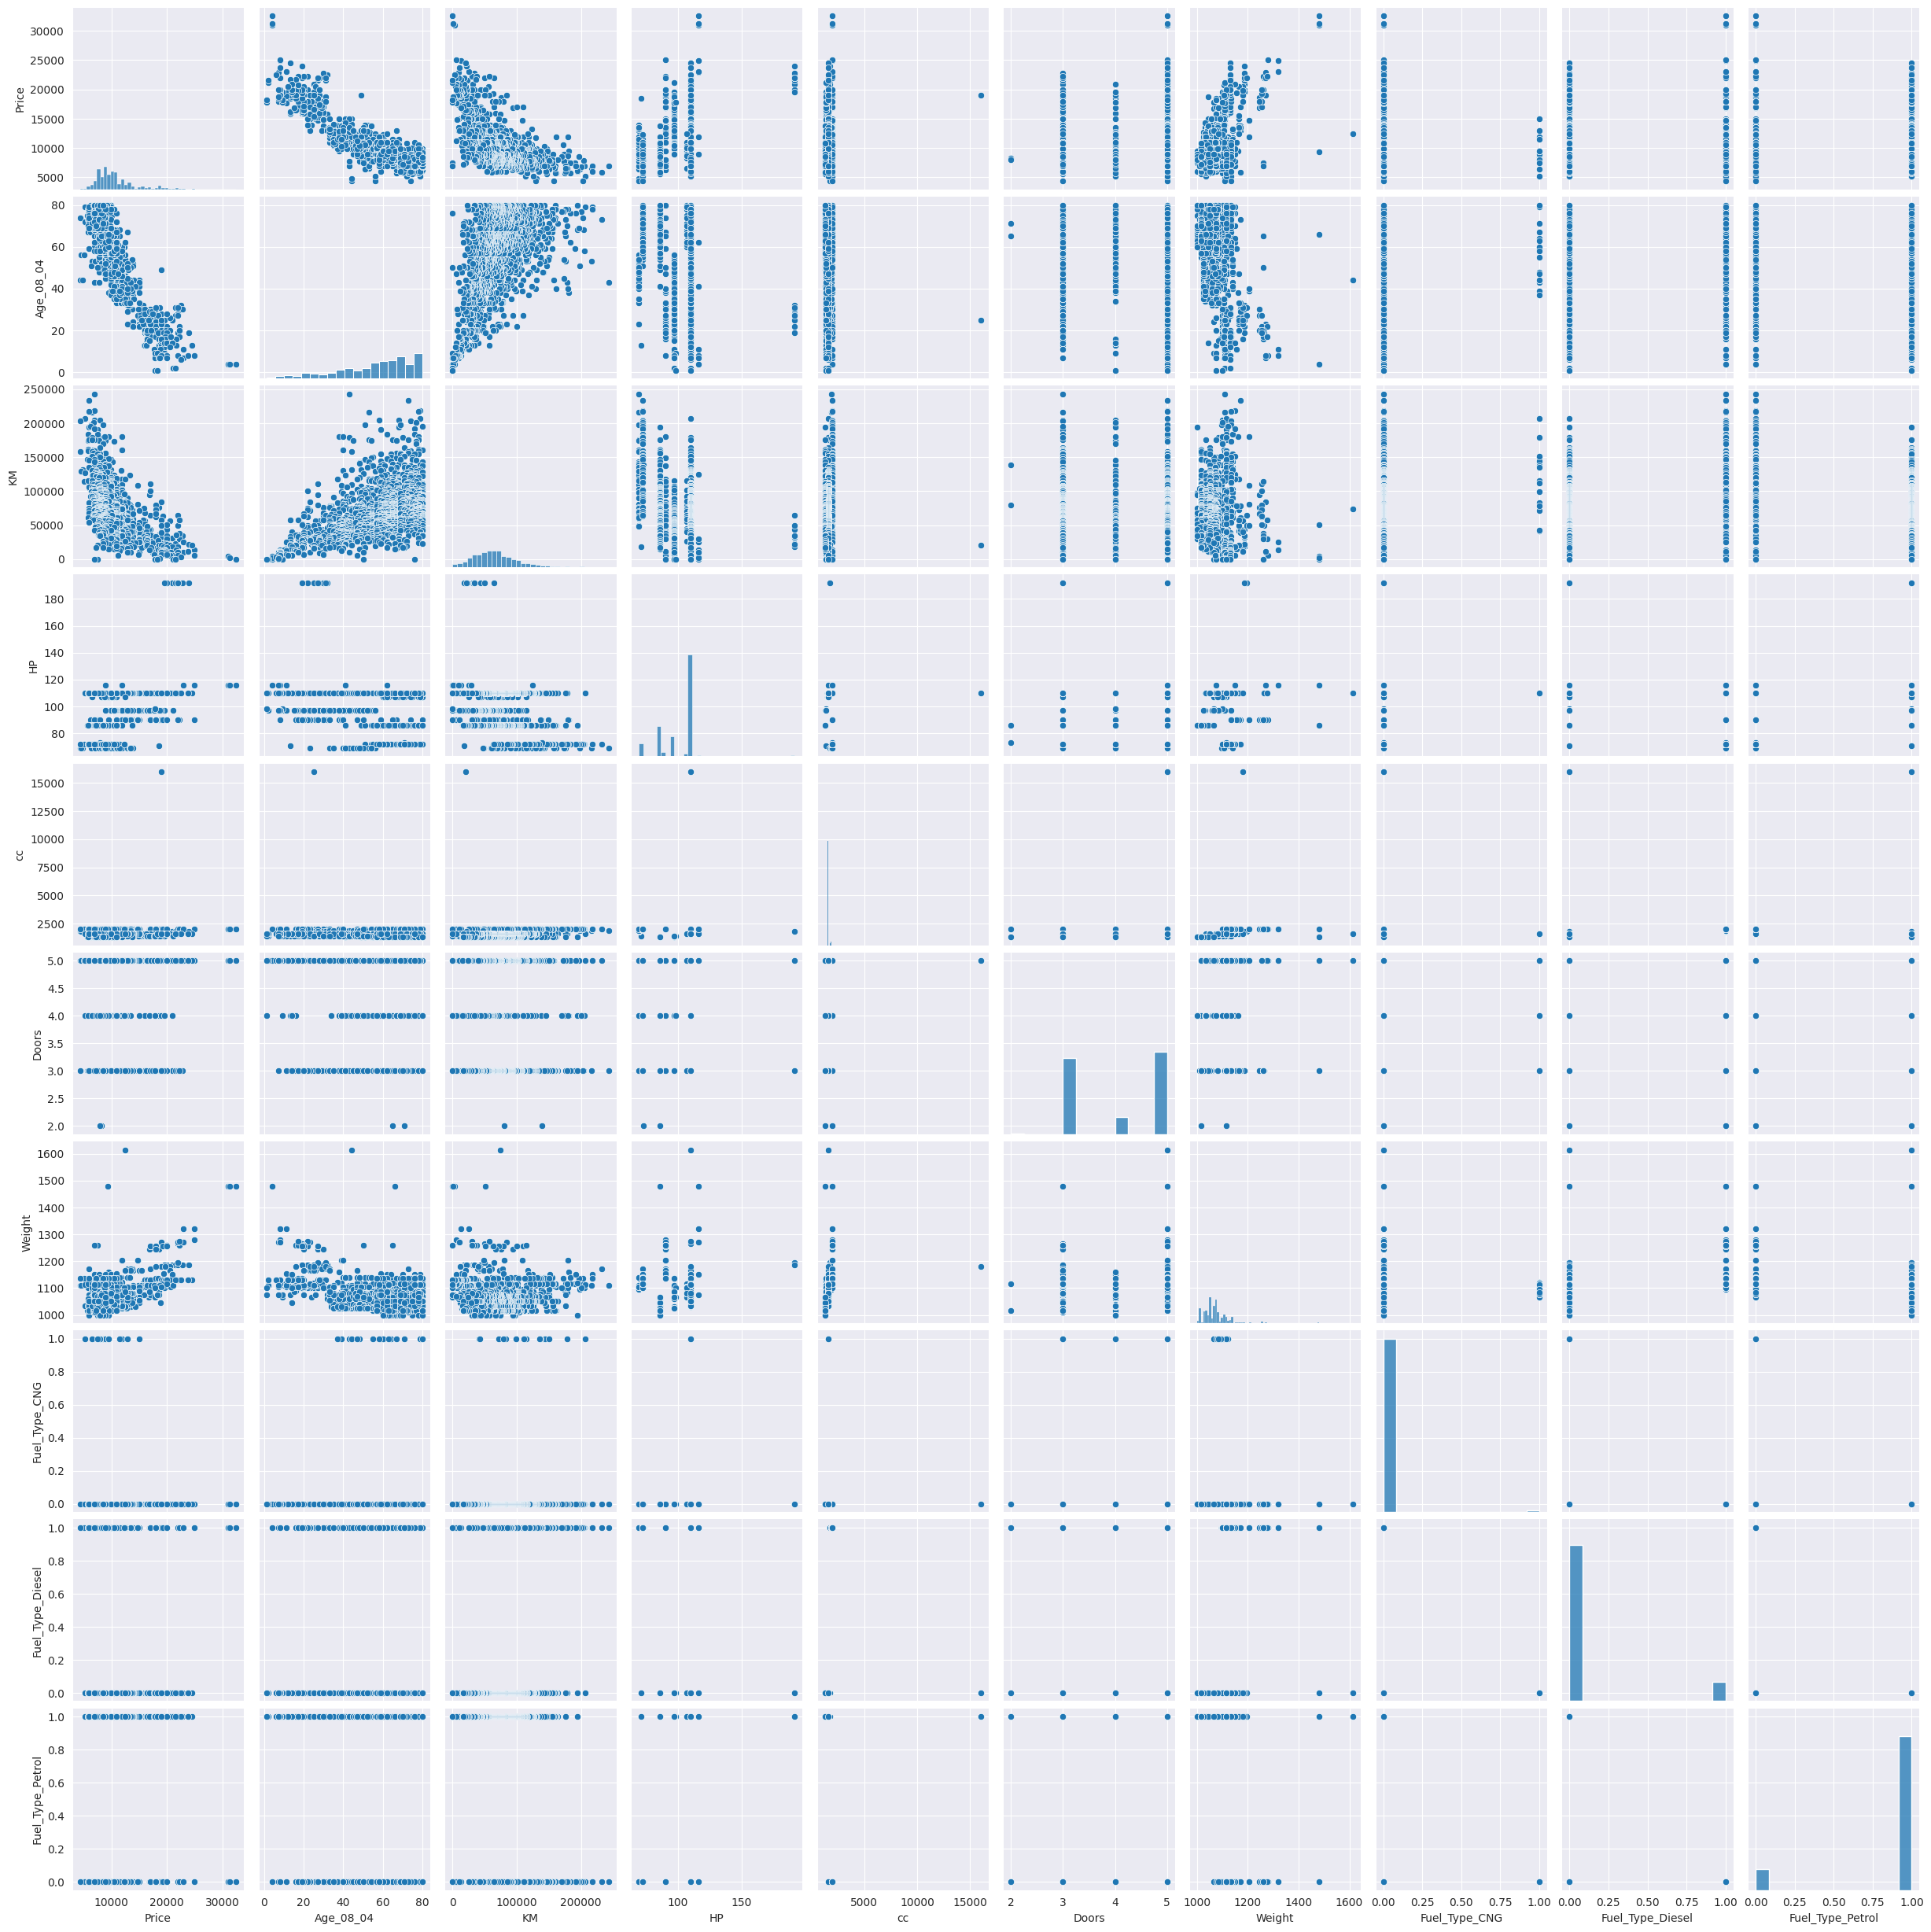

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(hot_encoded_data1)

**Preparing a Model**

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit()

In [ ]:
model.params

Intercept          -5129.180674
Age                 -123.334007
KM                    -0.017324
HP                    24.736832
cc                    -0.042361
Doors                -61.227644
Weight                21.365354
Fuel_Type_CNG      -2314.076889
Fuel_Type_Diesel   -1737.948883
Fuel_Type_Petrol   -1077.154902
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept           -5.659825
Age                -47.121298
KM                 -13.025122
HP                   7.120048
cc                  -0.461255
Doors               -1.527086
Weight              17.929131
Fuel_Type_CNG       -6.095932
Fuel_Type_Diesel    -4.286005
Fuel_Type_Petrol    -4.088612
dtype: float64 
 Intercept            1.828845e-08
Age                 4.336765e-293
KM                   9.990374e-37
HP                   1.704199e-12
cc                   6.446863e-01
Doors                1.269612e-01
Weight               5.480878e-65
Fuel_Type_CNG        1.397755e-09
Fuel_Type_Diesel     1.941107e-05
Fuel_Type_Petrol     4.581715e-05
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637414879326784, 0.8629775999883627)

**Calculating VIF**

In [ ]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc= smf.ols('cc~Age+KM+HP+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors= smf.ols('Doors~Age+KM+HP+cc+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Weight= smf.ols('Weight~Age+KM+HP+cc+Doors+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

rsq_Fuel_Type_CNG= smf.ols('Fuel_Type_CNG~Age+KM+HP+cc+Doors+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_Fuel_Type_CNG = 1/(1-rsq_Fuel_Type_CNG)

rsq_Fuel_Type_Diesel= smf.ols('Fuel_Type_Diesel~Age+KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Petrol',data=hot_encoded_data1).fit().rsquared
vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)

rsq_Fuel_Type_Petrol= smf.ols('Fuel_Type_Petrol~Age+KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel',data=hot_encoded_data1).fit().rsquared
vif_Fuel_Type_Petrol = 1/(1-rsq_Fuel_Type_Petrol)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Weight,vif_Fuel_Type_CNG,vif_Fuel_Type_Diesel,vif_Fuel_Type_Petrol]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

<ipython-input-52-d0437e5847ac>:20: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_CNG = 1/(1-rsq_Fuel_Type_CNG)
<ipython-input-52-d0437e5847ac>:23: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)
<ipython-input-52-d0437e5847ac>:26: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_Petrol = 1/(1-rsq_Fuel_Type_Petrol)


,Variables,VIF
0,Age,1.886819
1,KM,1.981120
2,HP,2.156663
3,cc,1.209317
4,Doors,1.161536
5,Weight,3.132749
6,Fuel_Type_CNG,inf
7,Fuel_Type_Diesel,inf
8,Fuel_Type_Petrol,inf


** Residual Analysis**

**Test for Normality of Residuals (Q-Q Plot)**

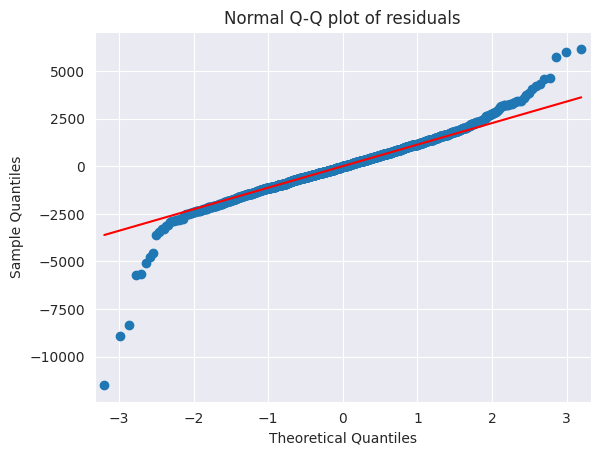

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>5000))

[array([109, 147, 523])]

In [ ]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 654, 960])]

**Residual Plot for Homoscedasticity**

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

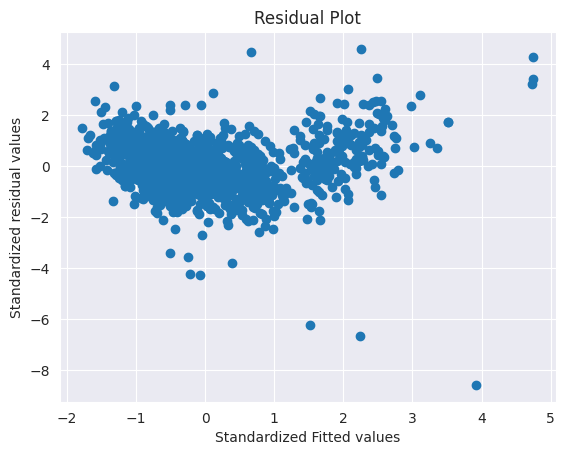

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**Residual Vs Regressors**

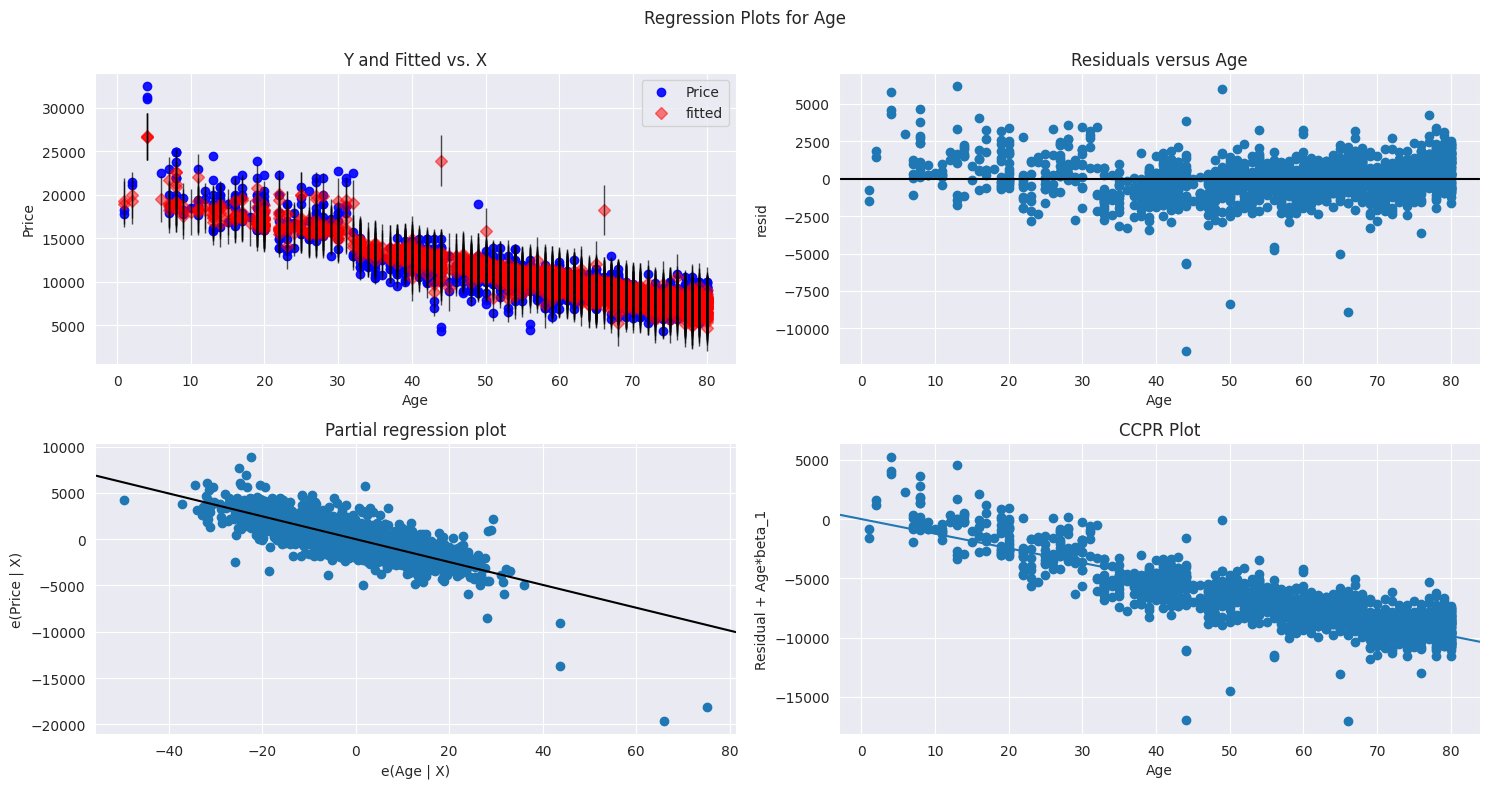

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

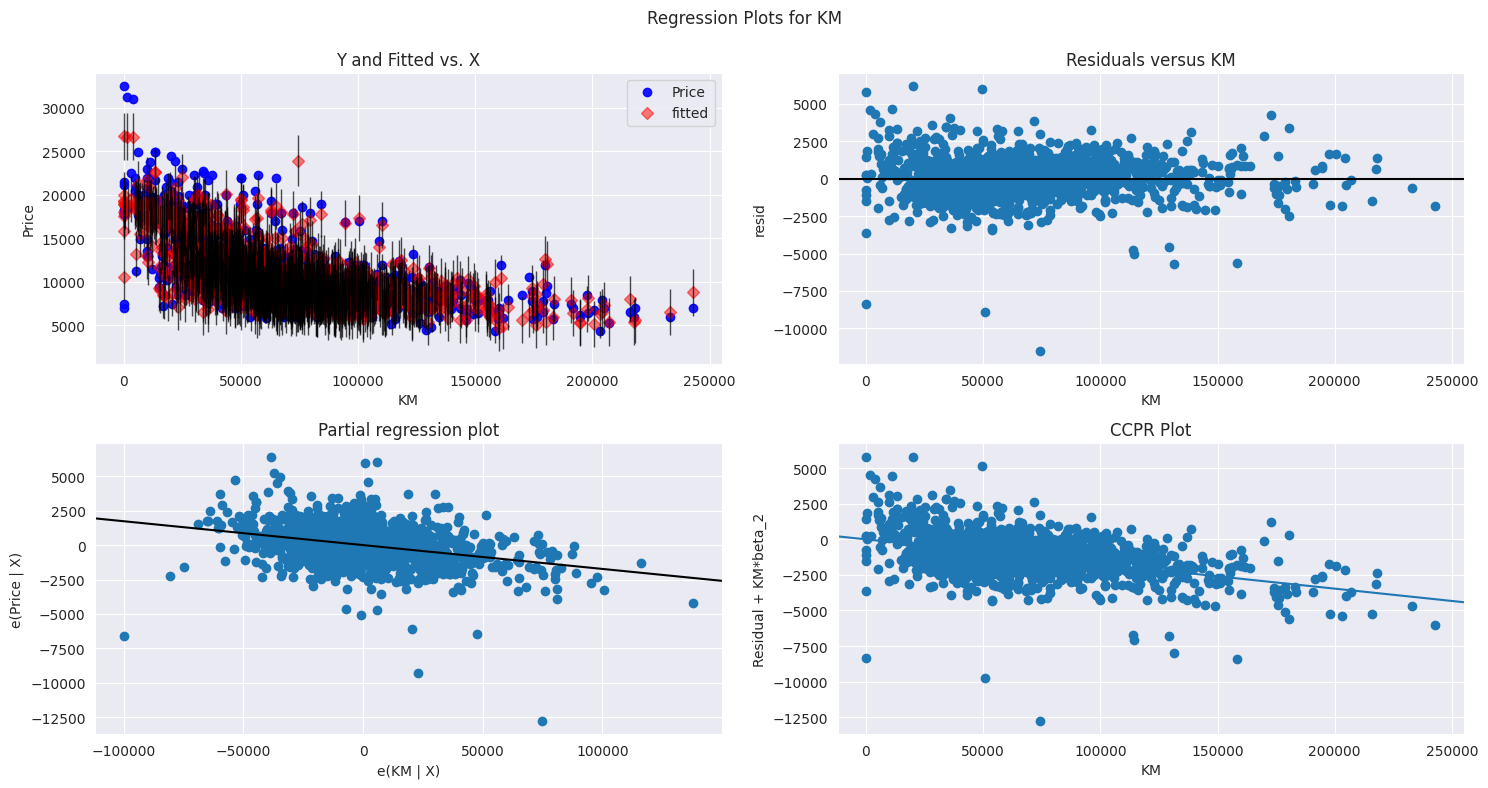

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

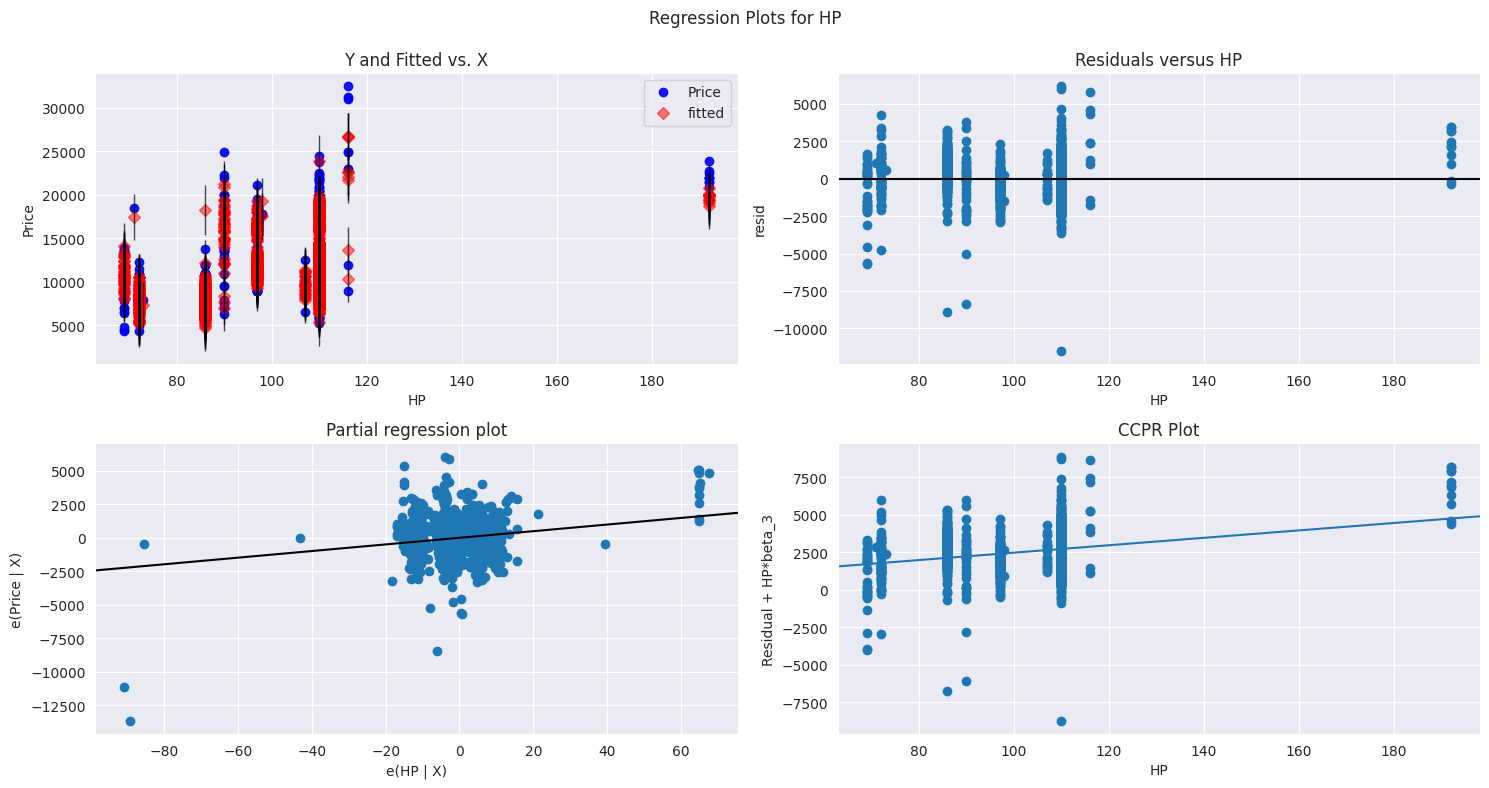

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

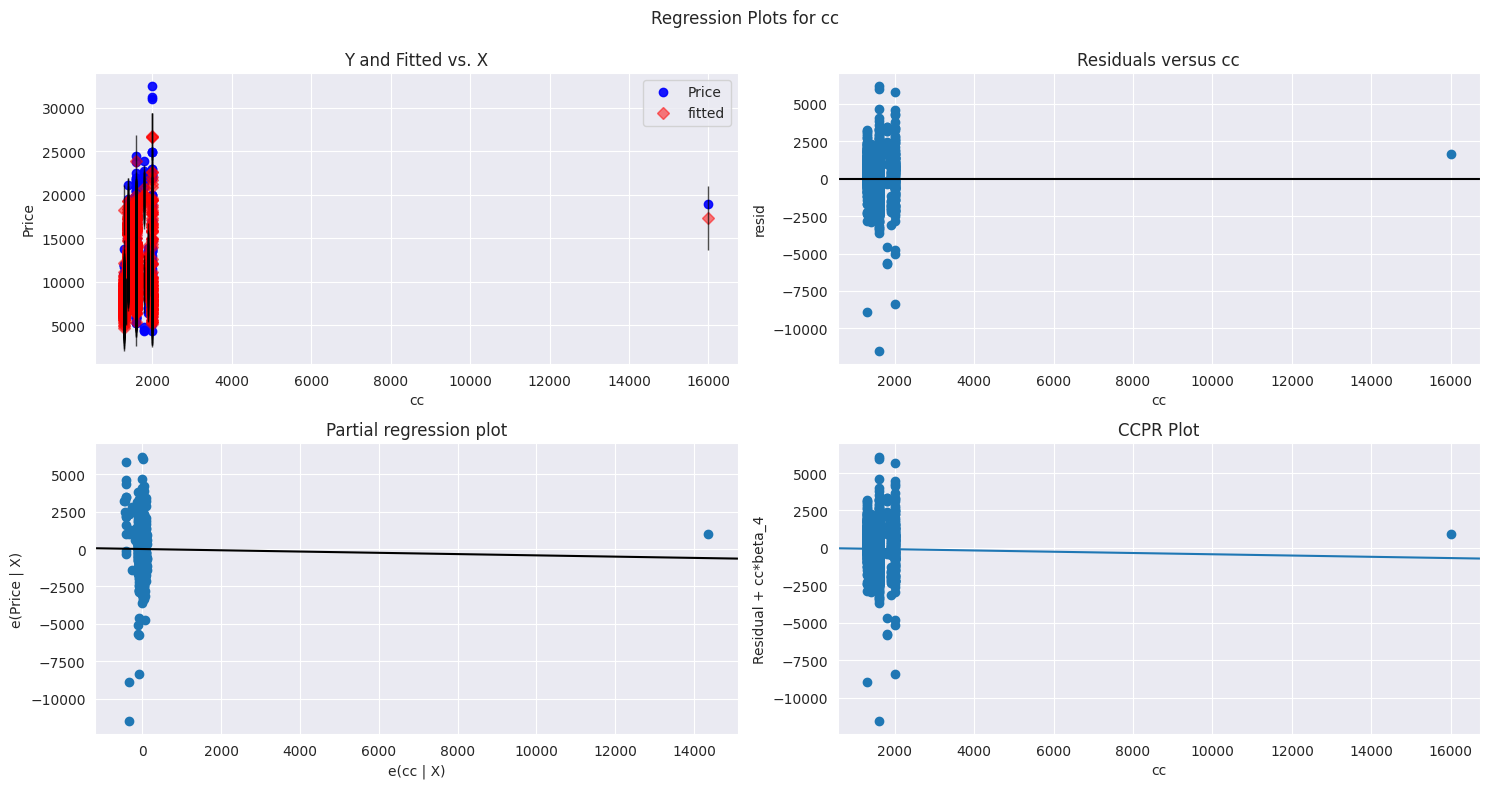

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

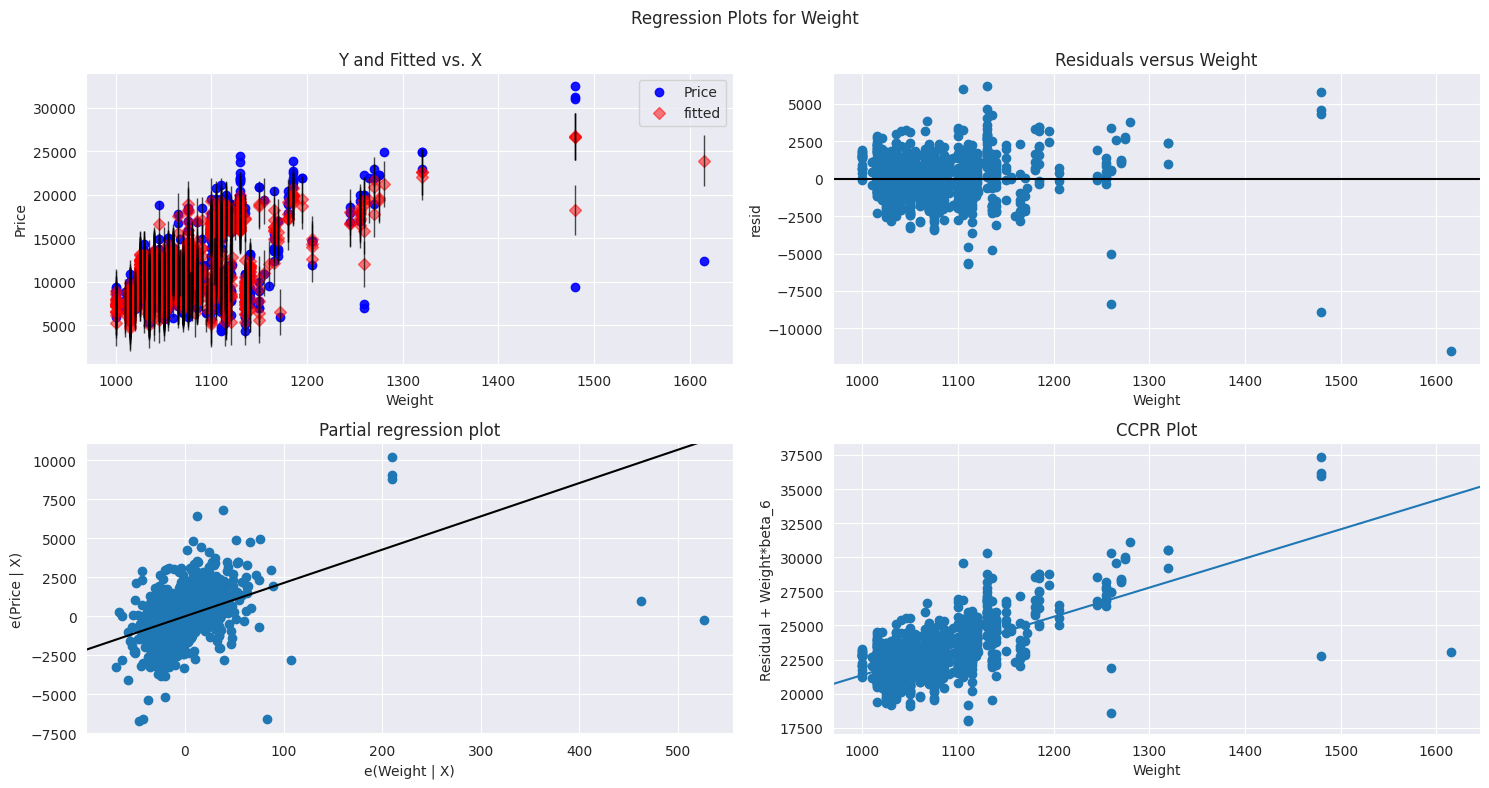

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

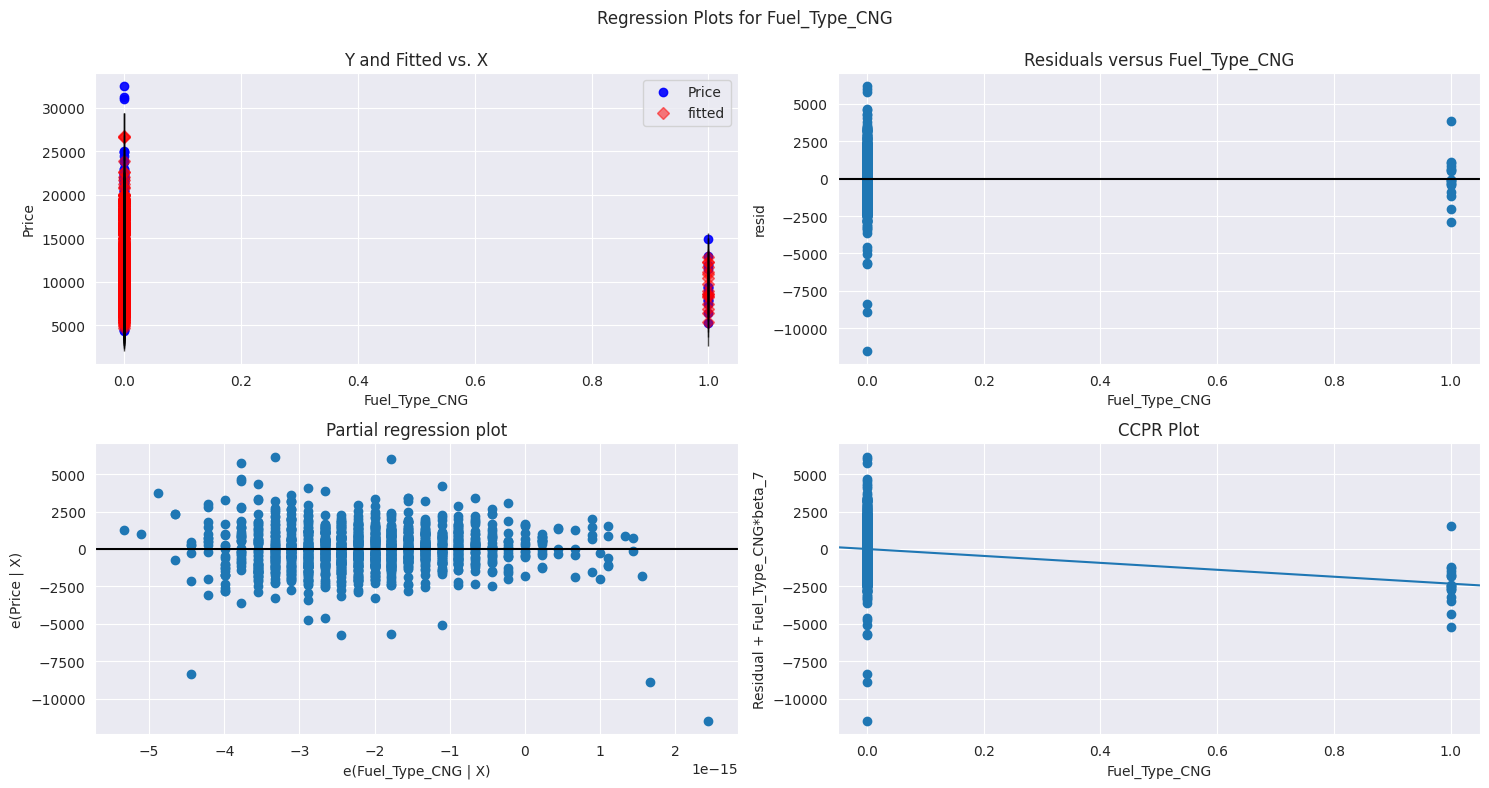

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Fuel_Type_CNG", fig=fig)
plt.show()

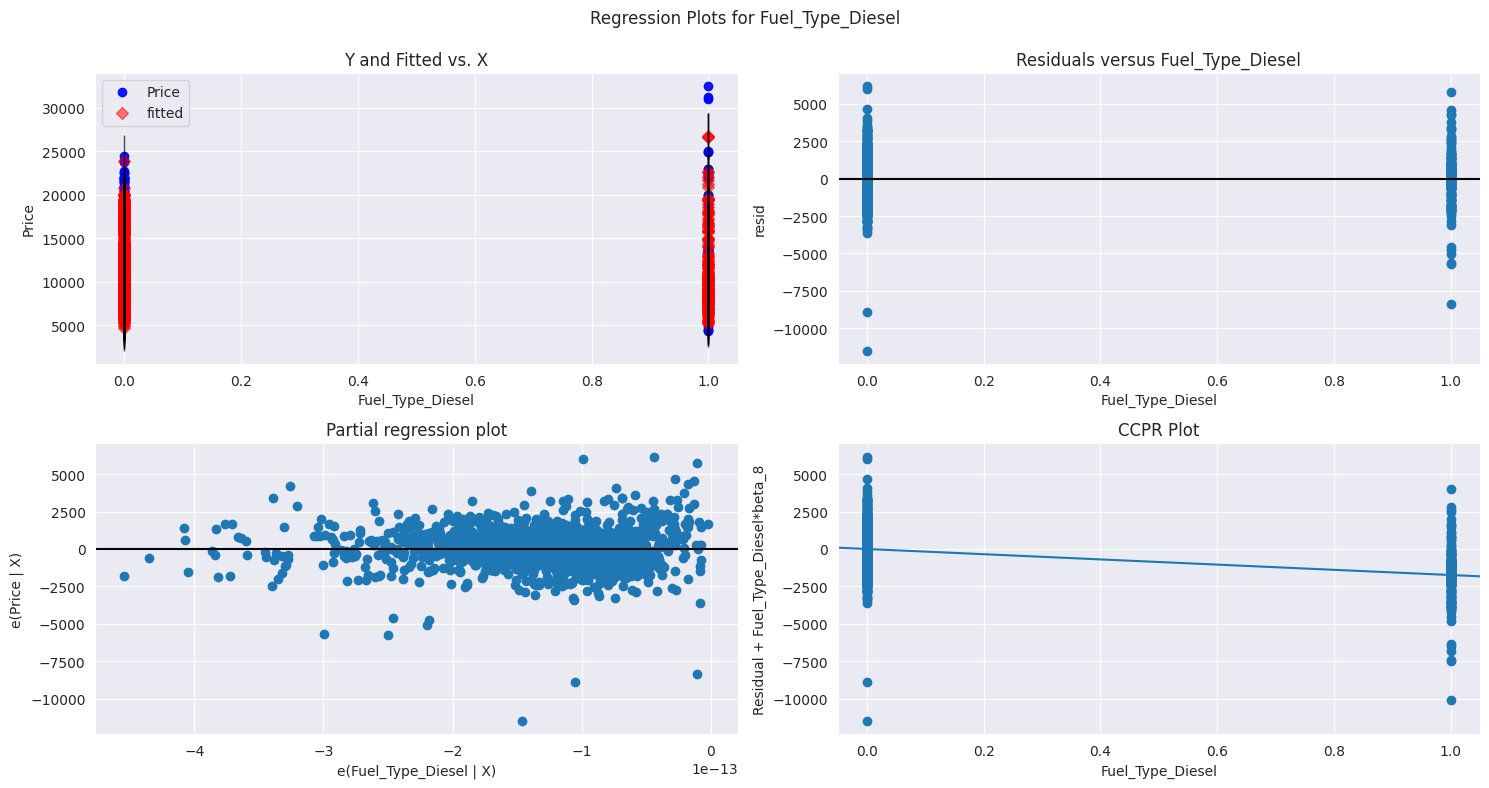

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Fuel_Type_Diesel", fig=fig)
plt.show()

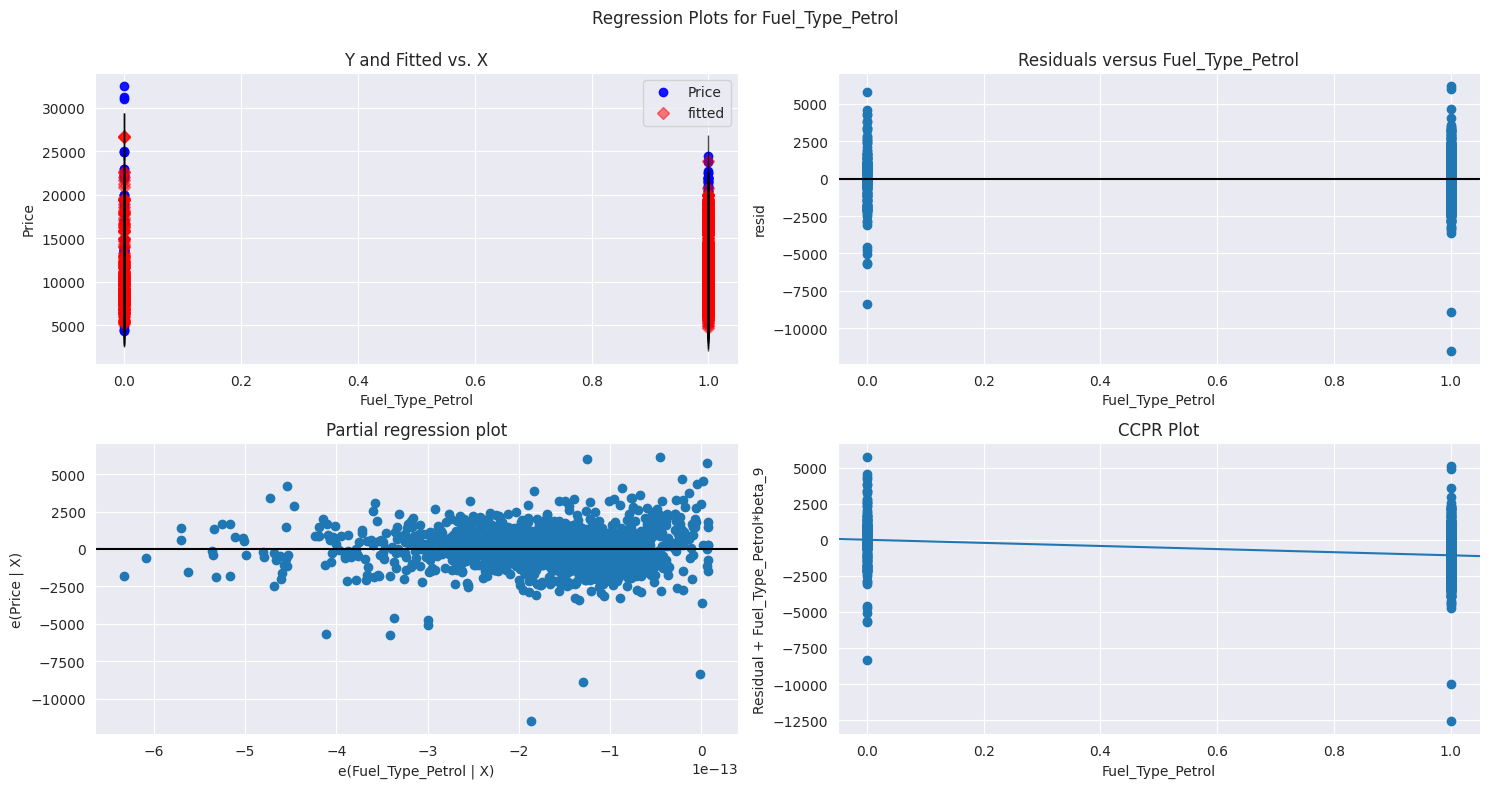

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Fuel_Type_Petrol", fig=fig)
plt.show()

**Model Deletion Diagnostics**

** Detecting Influencers/Outliers**

** Cook’s Distance**

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

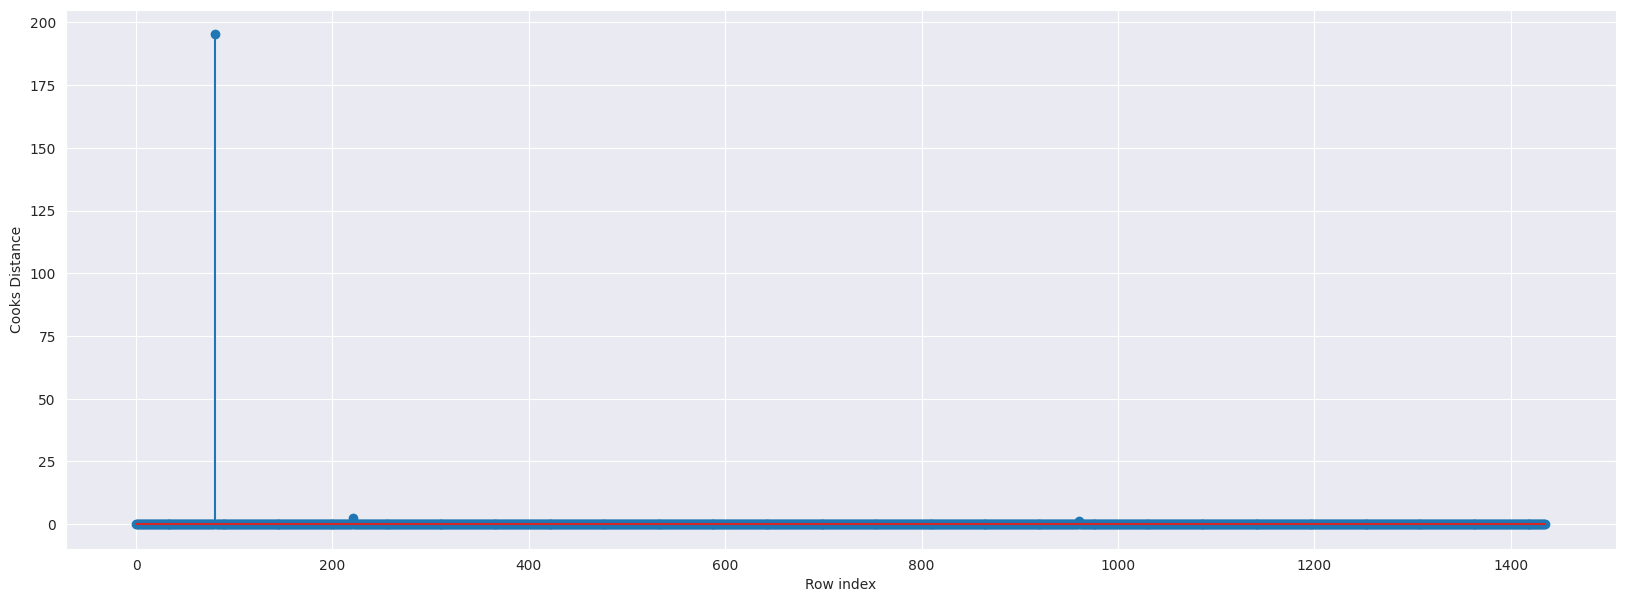

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(hot_encoded_data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 195.249360342592)

**High Influence points**

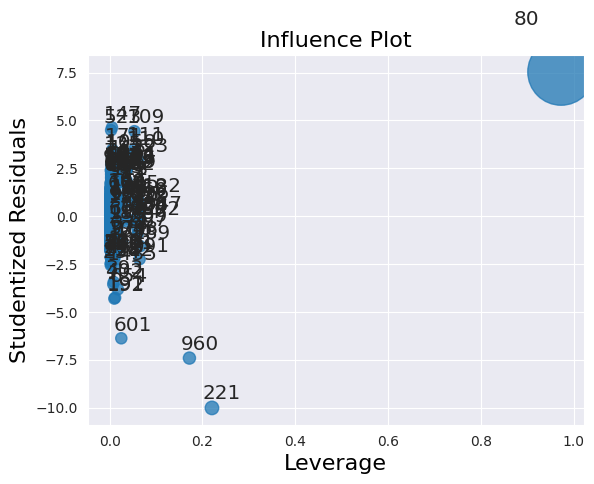

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = hot_encoded_data1.shape[1]
n = hot_encoded_data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data point 601,960,221 and 80 are the influencers

In [ ]:
hot_encoded_data1[hot_encoded_data1.index.isin([601,960,221,80])]

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,16000,5,1180,0,0,1
221,12450,44,74172,110,1600,5,1615,0,0,1
601,7500,50,1,90,2000,3,1260,0,1,0
960,9390,66,50806,86,1300,3,1480,0,0,1


In [ ]:
hot_encoded_data1.head()

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,3,1165,0,1,0
1,13750,23,72937,90,2000,3,1165,0,1,0
2,13950,24,41711,90,2000,3,1165,0,1,0
3,14950,26,48000,90,2000,3,1165,0,1,0
4,13750,30,38500,90,2000,3,1170,0,1,0


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Toyota1=hot_encoded_data1.drop(hot_encoded_data1.index[[80,221,601,960]],axis=0).reset_index()

**Improving the model**

In [ ]:
Toyota1=Toyota1.drop(['index'],axis=1)

In [ ]:
Toyota1

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,3,1165,0,1,0
1,13750,23,72937,90,2000,3,1165,0,1,0
2,13950,24,41711,90,2000,3,1165,0,1,0
3,14950,26,48000,90,2000,3,1165,0,1,0
4,13750,30,38500,90,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,1025,0,0,1
1428,10845,72,19000,86,1300,3,1015,0,0,1
1429,8500,71,17016,86,1300,3,1015,0,0,1
1430,7250,70,16916,86,1300,3,1015,0,0,1


**Build Model**

In [ ]:
final_ml= smf.ols('Price~Age+KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data = Toyota1).fit()

In [ ]:
(final_ml.rsquared,final_ml.aic)

(0.8903020130499644, 24387.56726022128)

**Cook's Distance**

In [ ]:
model_influence_V = final_ml.get_influence()
(c_V, _) = model_influence_V.cooks_distance

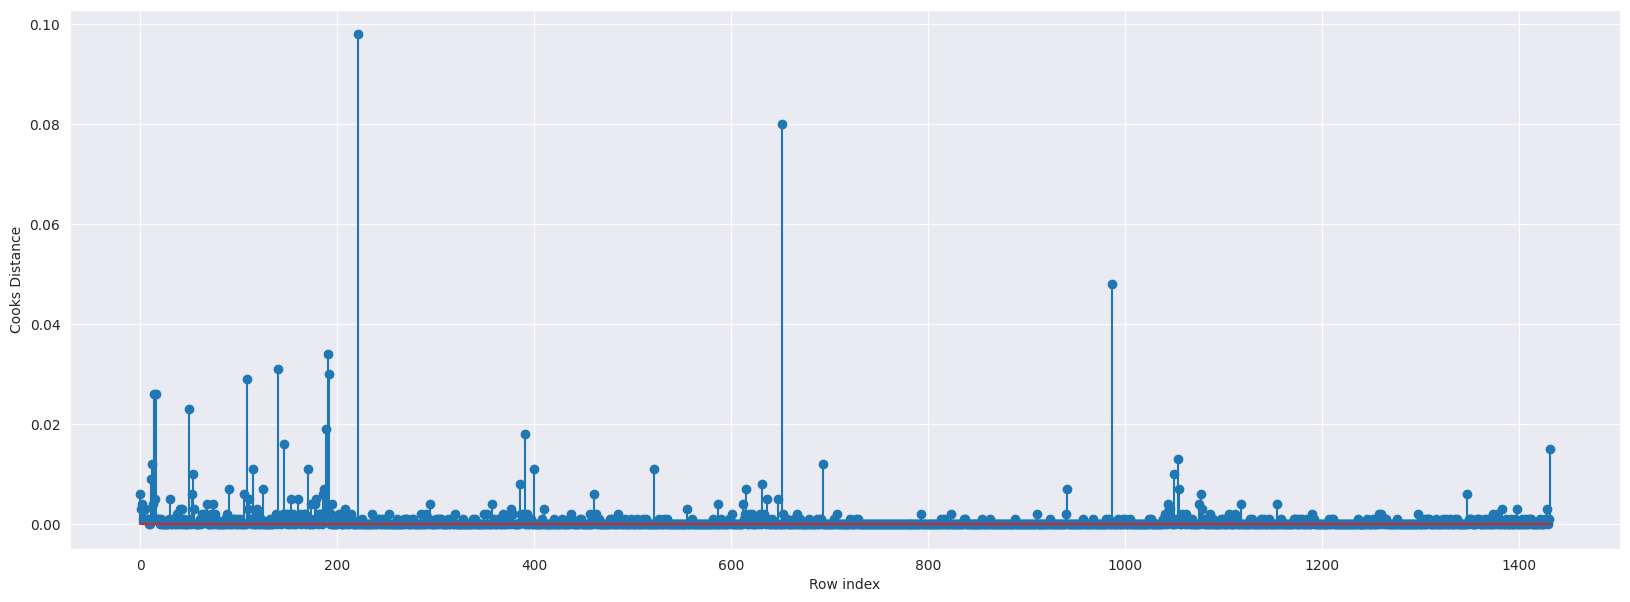

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(221, 0.09807223246384347)

In [ ]:
#Drop 221 observation
Toyota2=Toyota1.drop(Toyota1.index[[221]],axis=0)

In [ ]:
Toyota3=Toyota2.reset_index()

In [ ]:
Toyota4=Toyota3.drop(['index'],axis=1)

In [ ]:
Toyota4

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,3,1165,0,1,0
1,13750,23,72937,90,2000,3,1165,0,1,0
2,13950,24,41711,90,2000,3,1165,0,1,0
3,14950,26,48000,90,2000,3,1165,0,1,0
4,13750,30,38500,90,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,1025,0,0,1
1427,10845,72,19000,86,1300,3,1015,0,0,1
1428,8500,71,17016,86,1300,3,1015,0,0,1
1429,7250,70,16916,86,1300,3,1015,0,0,1


#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml= smf.ols('Price~Age+KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data = Toyota4).fit()

In [ ]:
(final_ml.rsquared,final_ml.aic)

(0.8913296777109743, 24356.720684337008)

**Predicting for new data**

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'Age':25,"KM":19613,"HP":70,"cc":1600,"Doors":5,"Weight":1185,"Fuel_Type_CNG":0,"Fuel_Type_Diesel":1,"Fuel_Type_Petrol":0},index=[1])

In [ ]:
final_ml.predict(new_data)

1    17494.321714
dtype: float64

In [ ]:
final_ml.predict(hot_encoded_data1.iloc[0:5,])

0    16183.162299
1    15777.271240
2    16154.646566
3    15834.241837
4    15711.599554
dtype: float64

In [ ]:
pred_y = final_ml.predict(hot_encoded_data1)

In [ ]:
pred_y

0       16183.162299
1       15777.271240
2       16154.646566
3       15834.241837
4       15711.599554
            ...     
1431     9068.540469
1432     8413.923971
1433     8555.975336
1434     8668.559677
1435    11057.670119
Length: 1436, dtype: float64

In [ ]:
hot_encoded_data1.Price

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64